In [129]:
import numpy as np
from scipy.integrate import RK45
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [130]:
teval = np.linspace(1.0e-6, 35, 1000)

In [131]:
#Initial conditions
C_0 = [1.0, 0]

In [132]:
n=[0, 0.5, 1.0000001, 1.5, 2.0001, 2.5, 3.000001, 3.5, 4.00001, 4.5, 5]
x=[0 for i in range (len(n))]
y1=[0 for i in range (len(n))]
y2=[0 for i in range (len(n))]

#Eq system def:
for i in range(len(n)):
    def LE(t,y):
        f1 = -(2.0/t)*y[1]-y[0]**n[i]
        f2 = y[1]
        return [f2, f1]   
    sol = solve_ivp(LE, [1.0e-6, 50], C_0, method='RK45', t_eval=teval, )  #Solving:
    x[i] = sol.t
    y1[i] = sol.y[0]  ###theta
    y2[i] = sol.y[1]  ###theta'

<ipython-input-132-448f1253f9fc>:9: RuntimeWarning: invalid value encountered in double_scalars
  f1 = -(2.0/t)*y[1]-y[0]**n[i]


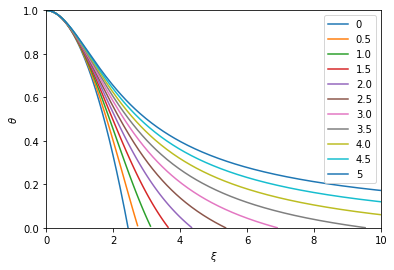

In [133]:
fig, ax = plt.subplots()
for i in range(len(n)):
    if n[i]!=1:
            tag=str(n[i])
            ax.plot(x[i], y1[i], label=tag[:3])
    else:
        xaux = [x[2][i] for i in range (90)]
        yaux = [y1[2][i] for i in range (90)]
ax.set_ylabel(r'$\theta$')
ax.set_xlabel(r'$\xi$')
plt.ylim(0,1)
plt.xlim(0,10)
plt.legend()

plt.savefig('dibujaco.png')

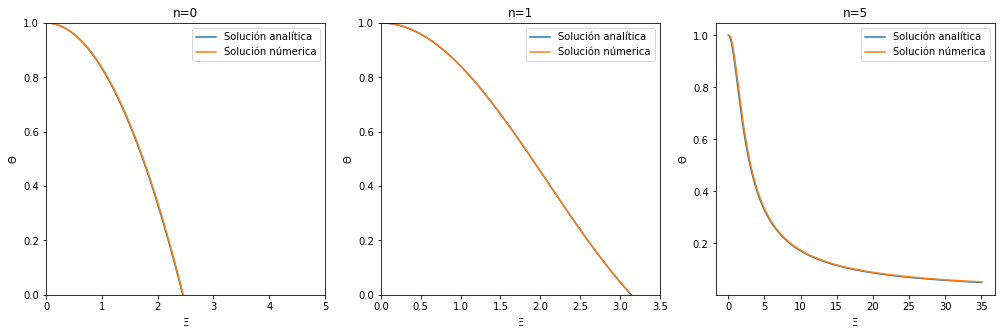

In [136]:
##Comparamos con solucionens analiticas
##Para n =0
fig, ax = plt.subplots(1,3, figsize = (17,5))

yn0 = [1-(1/6.0)*teval[i]**2 for i in range (len(teval))]

ax[0].plot(teval,yn0, label='Solución analítica')
ax[0].plot(x[0]+0.01, y1[0], label='Solución númerica')
ax[0].legend()
ax[0].set_title('n=0')
ax[0].set_ylim(0,1)
ax[0].set_xlim(0,5)
ax[0].set_ylabel('$\Theta$')
ax[0].set_xlabel('$\Xi$')


yn5 = [1/(np.sqrt(1+teval[i]**2/3)) for i in range (len(teval))]

ax[2].plot(teval,yn5,label='Solución analítica')
ax[2].plot(x[10]+0.1, y1[10],label='Solución númerica')
ax[2].legend()
ax[2].set_title('n=5')
ax[2].set_ylabel('$\Theta$')
ax[2].set_xlabel('$\Xi$')


yn1 = [np.sin(teval[i])/teval[i] for i in range (len(teval))]

ax[1].plot(teval,yn1,label='Solución analítica')
ax[1].plot(x[2], y1[2]+0.001,label='Solución númerica')
ax[1].legend()
ax[1].set_title('n=1')
ax[1].set_ylabel('$\Theta$')
ax[1].set_xlabel('$\Xi$')
ax[1].set_xlim(0,3.5)
ax[1].set_ylim(0,1)
plt.savefig('compaaracion.png')

In [135]:
xipfin = [y2[i][len(y2[i])-1] for i in range (11)]

Rn = [x[i][len(x[i])-1] for i in range (11)]
Dn = [(-(3/Rn[i])*xipfin[i])**-1 for i in range (11)]
Mn = [-Rn[i]**2*xipfin[i] for i in range (11)]

e0 = [(3-n[i])/(3*n[i]) for i in range (11) ]
e1 = [(n[i]-1)/n[i] for i in range (11)] 
e2 = [(-n[i]+3)/n[i] for i in range (11)] 

Bn = [np.power(3*Dn[i],e0[i])/((n[i]+1)*np.power(Mn[i],e1[i])*np.power(Rn[i],e2[i])) for i in range (11)]


ZeroDivisionError: division by zero

In [23]:
alphc1 = np.sqrt((2.5*3.15e6)/(4*np.pi*6.67e-11*5.0e9**(1/3)))
alphc2 = np.sqrt((2.5*3.15e6)/(4*np.pi*6.67e-11*1.0e9**(1/3)))

In [24]:
M1 = [-4*np.pi*alphc1**3*5.0e9*x[3][i]**2*y2[3][i] for i in range (len(x[3]))]
M2 = [-4*np.pi*alphc2**3*1.0e9*x[3][i]**2*y2[3][i] for i in range (len(x[3]))]
R1 = [alphc1*x[3][i] for i in range (len(x[3]))]
R2 = [alphc2*x[3][i] for i in range (len(x[3]))]
den1 = [5.0e9*y1[3][i]**1.5 for i in range (len(x[3]))]
den2 = [1.0e9*y1[3][i]**1.5 for i in range (len(x[3]))]

M1sol = [M1[i]/1.989e30 for i in range (len(M1))]
M2sol = [M2[i]/1.989e30 for i in range (len(M2))]
R1sol = [R1[i]/6.597e8 for i in range (len(R1))]
R2sol = [R2[i]/6.597e8 for i in range (len(R1))]

Text(0, 0.5, 'log($\\rho$) [kg/m$^3$]')

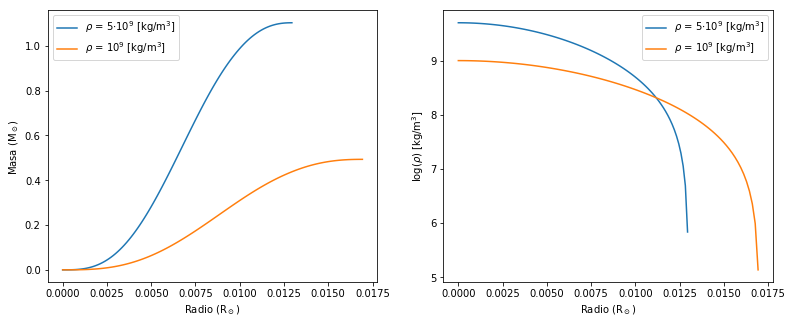

In [142]:
fig, ax = plt.subplots(1,2, figsize = (13,5))
ax[0].plot(R1sol, M1sol, label=r'$\rho$ = 5$\cdot$10$^9$ [kg/m$^3$]')
ax[0].plot(R2sol, M2sol, label=r'$\rho$ = 10$^9$ [kg/m$^3$]')
ax[1].plot(R1sol, np.log10(den1), label=r'$\rho$ = 5$\cdot$10$^9$ [kg/m$^3$]')
ax[1].plot(R2sol, np.log10(den2), label=r'$\rho$ = 10$^9$ [kg/m$^3$]')
ax[0].legend()
ax[1].legend()

ax[0].set_xlabel(r'Radio (R$_\odot$)')
ax[1].set_xlabel(r'Radio (R$_\odot$)')

ax[0].set_ylabel(r'Masa (M$_\odot$)')
ax[1].set_ylabel(r'log($\rho$) [kg/m$^3$]')


##plt.savefig('elultimo.png')


In [25]:
print( 'M1', M1sol[-1], 'M2', M2sol[-1])
print('R1', R1sol[-1], 'R2', R2sol[-1])

M1 1.1032502398741584 M2 0.4933885065103134
R1 0.012946487300759564 R2 0.016929609875857243


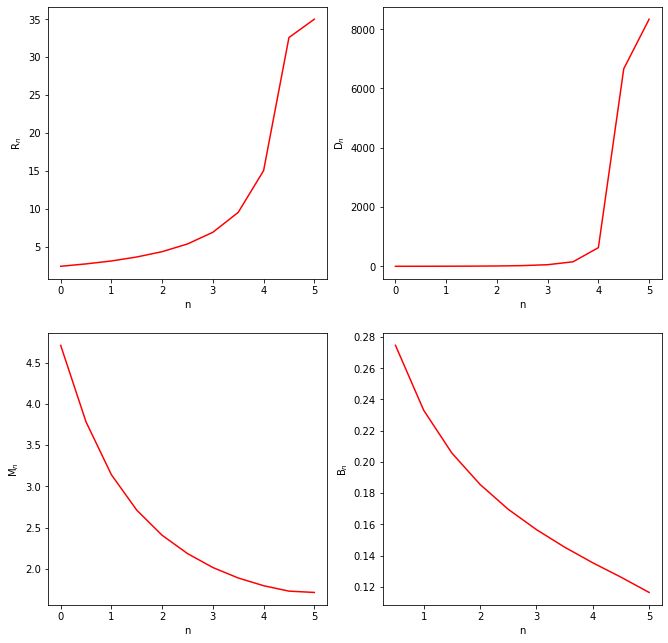

In [26]:
fig, ax = plt.subplots(2,2, figsize = (11,11))
ax[0][0].plot(n, Rn, color='red')
ax[0][1].plot(n, Dn, color='red')
ax[1][0].plot(n, Mn, color='red')
ax[1][1].plot(n, Bn, color='red')

ax[0][0].set_ylabel('R$_n$')
ax[0][1].set_ylabel('D$_n$')
ax[1][0].set_ylabel('M$_n$')
ax[1][1].set_ylabel('B$_n$')

for i in range (2):
    for j in range(2):
        ax[i][j].set_xlabel('n')
        
#plt.savefig('Costantes')

In [145]:
Rn

[2.417418348348349,
 2.732733654654655,
 3.1181190290290295,
 3.6436445395395403,
 4.344345220220221,
 5.360361207207208,
 6.901902704704706,
 9.529530257257258,
 15.030030600600602,
 32.61761768568569,
 35.0]

In [27]:
def ellewi(x):    
    return x

x = [i for i in range (100)]
y = [ellewi(i) for i in range (100)]

fig, ax 

(<Figure size 792x792 with 4 Axes>,
 array([[<AxesSubplot:xlabel='n', ylabel='R$_n$'>,
         <AxesSubplot:xlabel='n', ylabel='D$_n$'>],
        [<AxesSubplot:xlabel='n', ylabel='M$_n$'>,
         <AxesSubplot:xlabel='n', ylabel='B$_n$'>]], dtype=object))